In [14]:
library(readxl)
dane_projekt <- read_excel("C:/Users/Oskar/Downloads/dane_projekt.xlsx")

### <font color='black'>**Celem przeprowadzonego badania jest ocena wpływu wybranych czynników na liczbę widzów w teatrach i instytucjach muzycznych w poszczególnych w Polsce.**</font> <br>
### <font color='black'>**Pytanie badawcze.**</font> <font color='black'>**Jakie czynniki i w jakim stopniu mają wpływ na liczbę widzów na wydarzeniach teatralnych i w instytucjach muzycznych w województwach w Polsce?**</font> 


### Zmienne wykorzystane do badania:
•	Y (widzowie) - widzowie i słuchacze ogółem [osoby]; <br>
•	X1 (ludnosc) – ludność ogółem [osoby]; <br>
•	X2 (miejsca) - liczba miejsc na widowni [szt.];<br>
•	X3 (teatrinst) - liczba teatrów i instytucji muzycznych [szt.];<br>
•	X4 (przedkon) - liczba przedstawień i koncertów [szt.];<br>
•	X5 (bezrob) - udział bezrobotnych zarejestrowanych w liczbie ludności w wieku produkcyjnym [%];<br>
•	X6 (dochod) - dochód do dyspozycji [zł]


## Statystyki opisowe

In [15]:
summary(dane_projekt[2:8])
sapply(dane_projekt[2:8],var)
# Wykorzystane w projekcie dane pochodzą z Banku Danych Lokalnych z Głównego Urzędu Statystycznego. 
# Pochodzą z 2019 roku. Dane nie wymagały przekształceń, były rzetelne i kompletne. 

    widzowie          ludnosc           miejsca        teatrinst    
 Min.   : 180535   Min.   : 982626   Min.   : 1566   Min.   : 3.00  
 1st Qu.: 284377   1st Qu.:1375543   1st Qu.: 2386   1st Qu.: 5.00  
 Median : 524432   Median :2117717   Median : 4617   Median : 8.00  
 Mean   : 897704   Mean   :2398911   Mean   : 6315   Mean   :11.75  
 3rd Qu.: 924484   3rd Qu.:3027848   3rd Qu.: 8311   3rd Qu.:15.50  
 Max.   :5190766   Max.   :5423168   Max.   :20419   Max.   :35.00  
    przedkon         bezrob          dochod    
 Min.   : 1113   Min.   :2.200   Min.   :1433  
 1st Qu.: 1943   1st Qu.:3.000   1st Qu.:1606  
 Median : 2934   Median :3.850   Median :1746  
 Mean   : 4344   Mean   :3.900   Mean   :1717  
 3rd Qu.: 5827   3rd Qu.:4.725   3rd Qu.:1779  
 Max.   :18151   Max.   :5.700   Max.   :2044  

widzowie              ludnosc              miejsca 
1482650276256.662598 1641020894014.000000      28745084.162500 
           teatrinst             przedkon               bezrob 
           77.400000      17535330.862500             1.162667 
              dochod 
        23485.432147

## Przygotowanie danych do stworzenia modelu ekonometrycznego <br>
### <font color='black'>**Histogramy**</font>

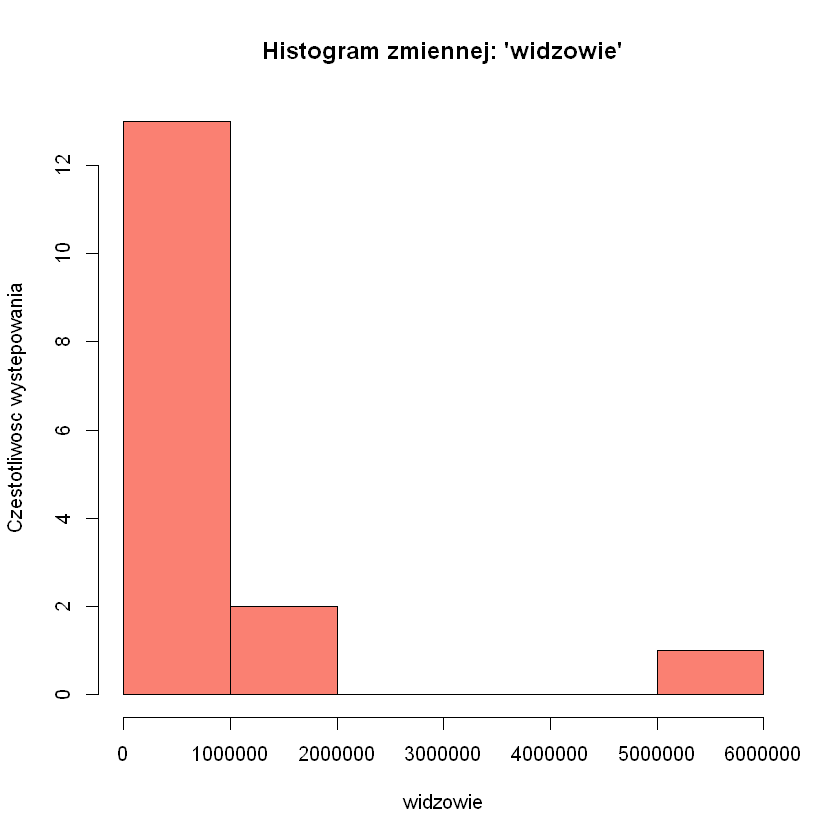

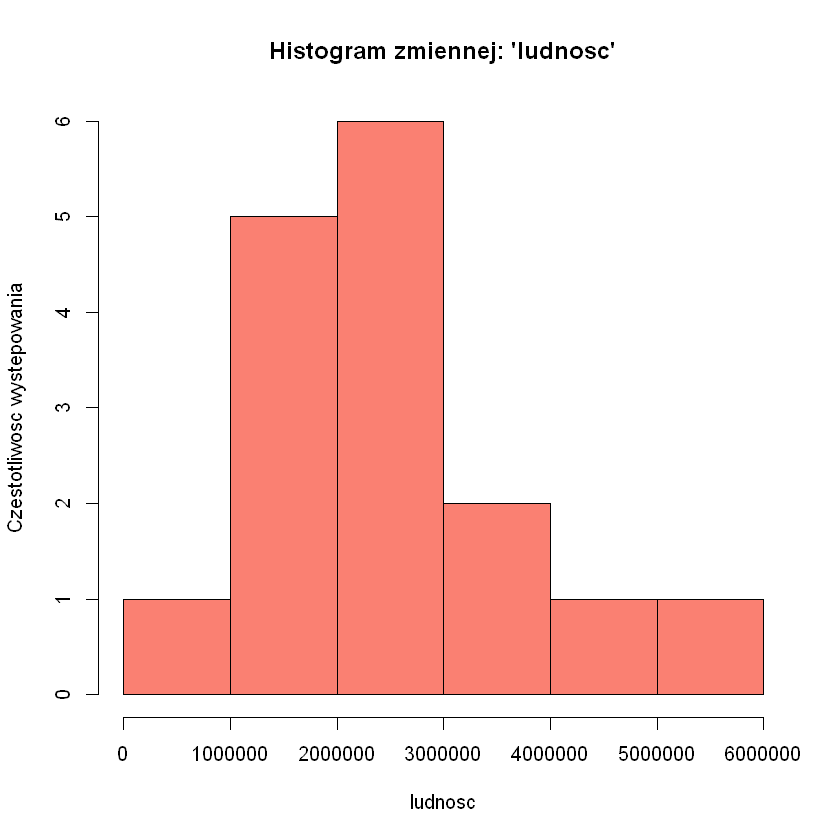

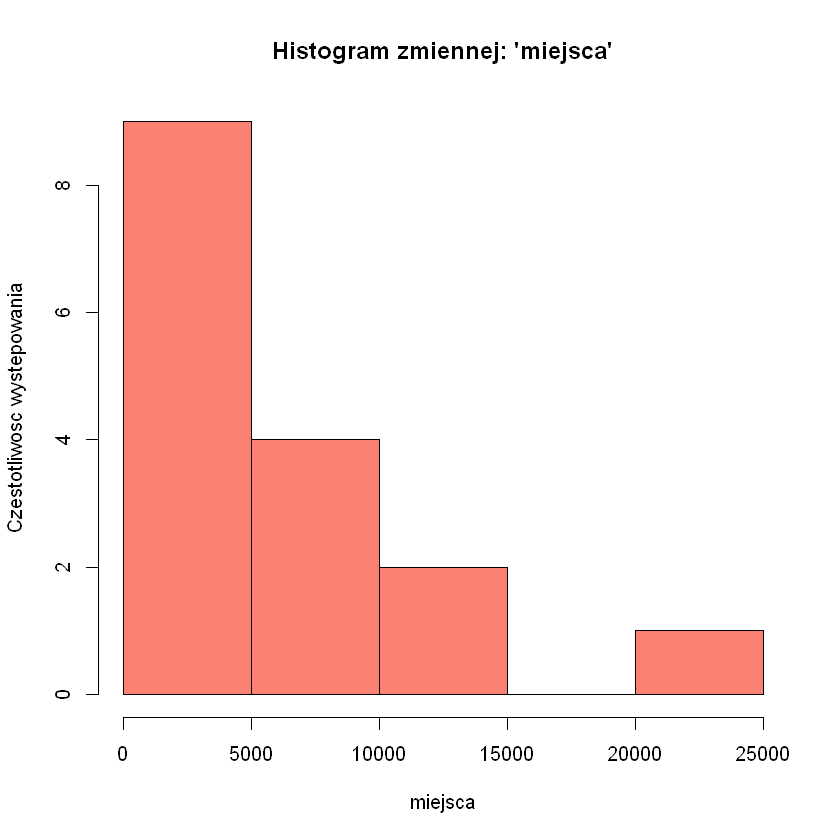

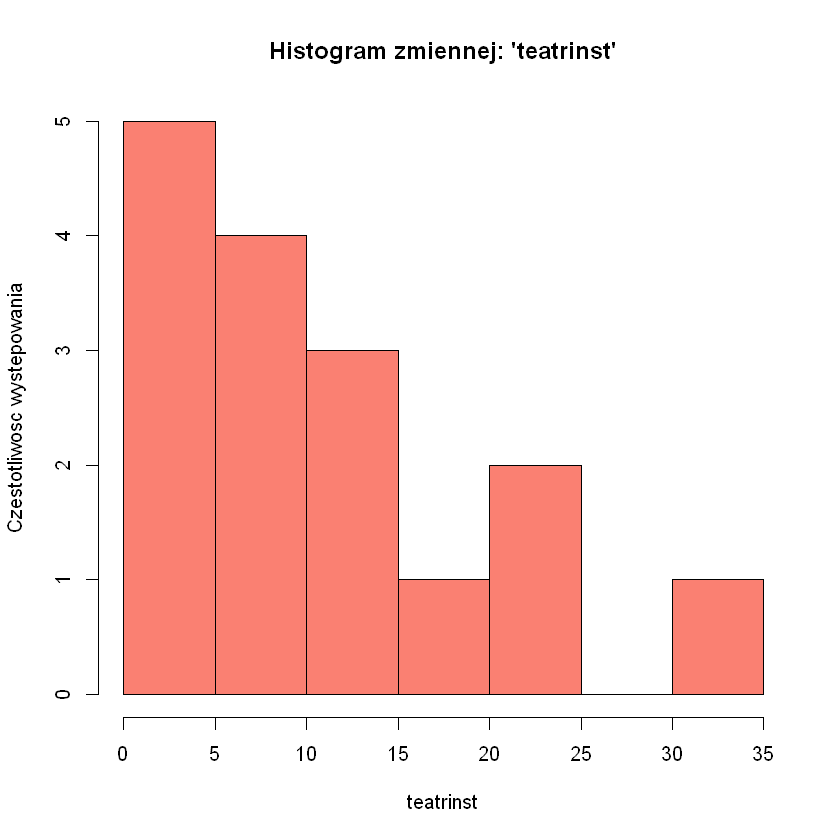

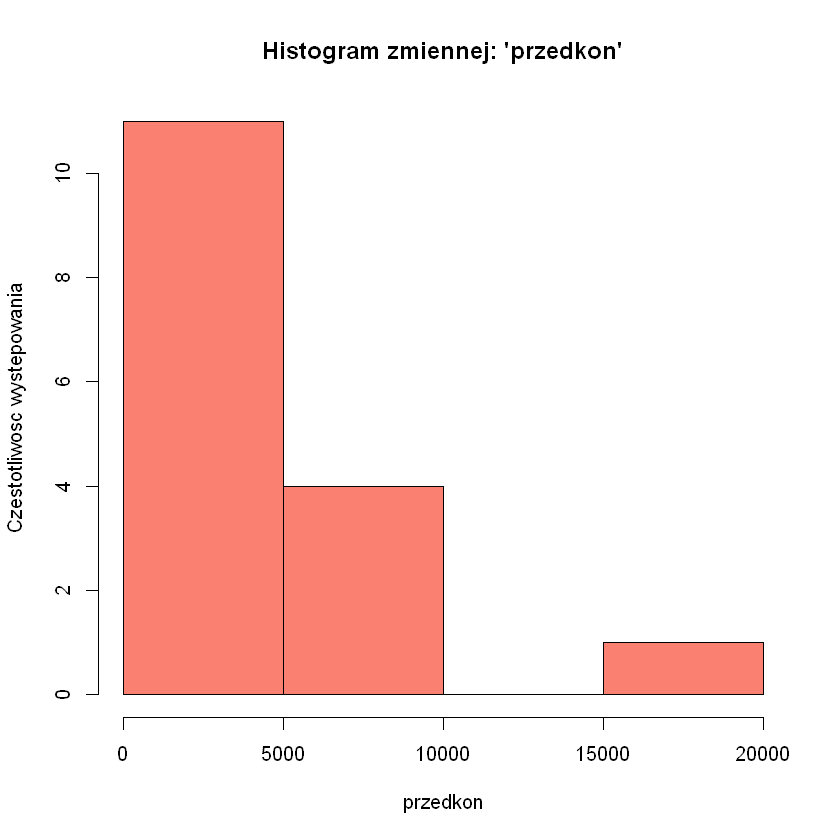

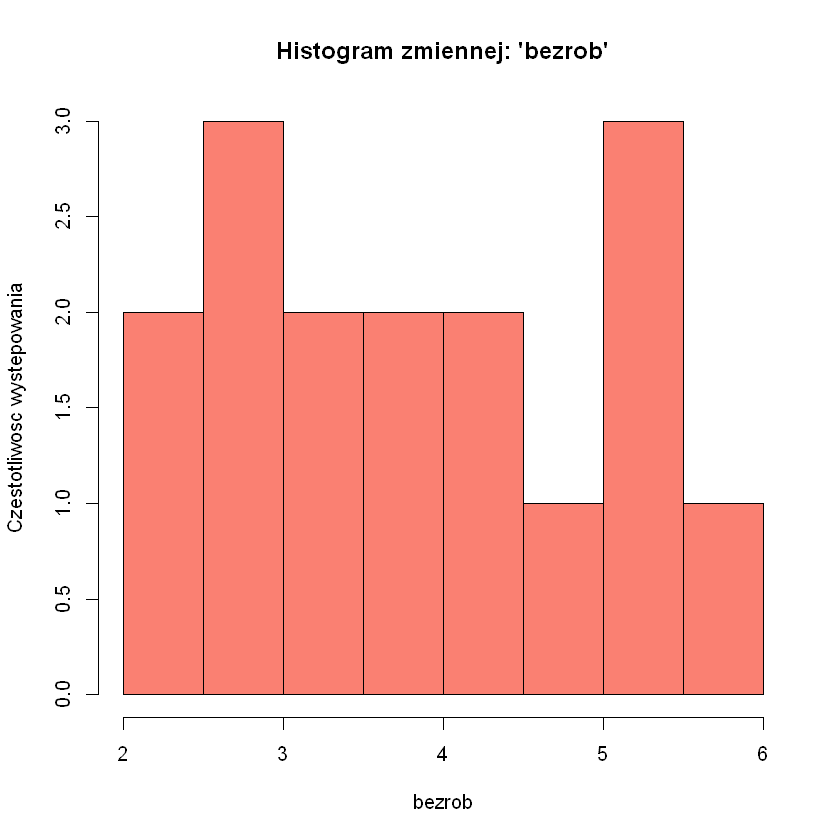

[1] "widzowie  est: 0.564  p=value: 0"
[1] "ludnosc  est: 0.902  p=value: 0.0872"
[1] "miejsca  est: 0.82  p=value: 0.005"
[1] "teatrinst  est: 0.852  p=value: 0.0146"
[1] "przedkon  est: 0.695  p=value: 0.0001"
[1] "bezrob  est: 0.954  p=value: 0.5496"
[1] "dochod  est: 0.968  p=value: 0.8133"


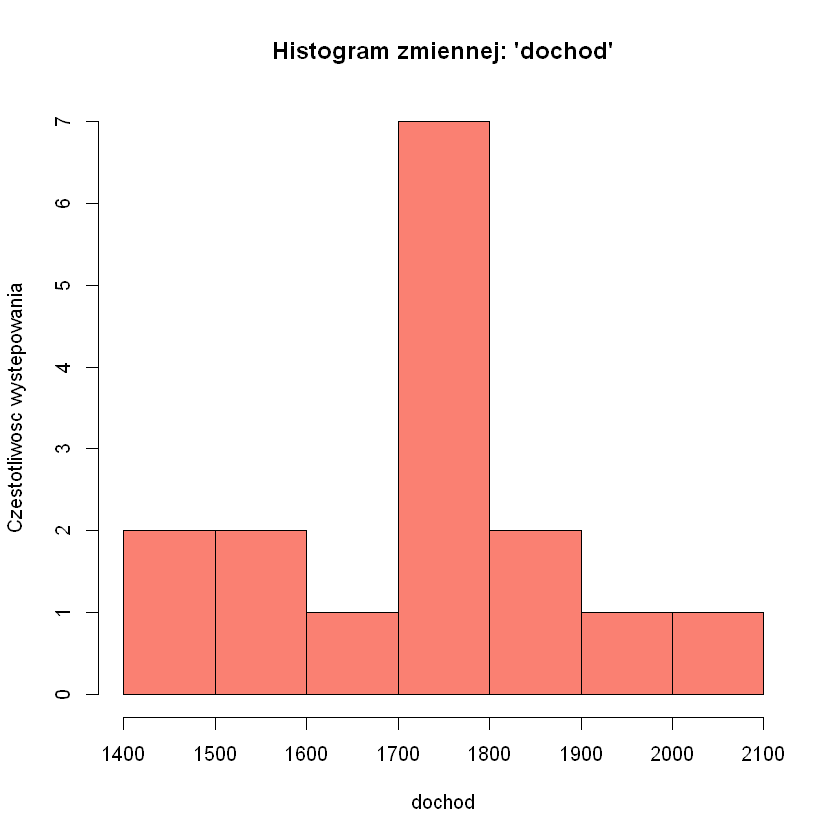

In [16]:
dane <- data.frame(dane_projekt[2:8],
                   row.names = dane_projekt$Wojewodztwo)
library(glue)
Dane_names <- names(dane)
for (i in 1:7) {
  Dane_names[i]
  main_hist <- glue("Histogram zmiennej: '{Dane_names[i]}'")
  hist(dane[,i], 
       main = main_hist,
       xlab = Dane_names[i],
       ylab = "Czestotliwosc wystepowania",
       col = "salmon", 
       border = "black", 
       cex = 0.5)
}

for (i in 1:7) {
  dane[,i]
  b <-shapiro.test(dane[,i])
  print(paste(colnames(dane[i]), " est:", round(b$statistic,3), " p=value:", round(b$p.value,4)))
}

## Sprawdzenie danych <br>
### wykresy rozrzutu 

In [17]:
install.packages("corrplot")
library(corrplot)


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'



In [18]:
korelacja <- cor(dane)
for (i in 2:7) {
  dane[,i]
  a <-cor.test(dane$widzowie, dane[,i])
  print(paste(colnames(dane[i]), " est:", round(a$estimate, 3), " p=value:", round(a$p.value, 3)))
}

[1] "ludnosc  est: 0.817  p=value: 0"
[1] "miejsca  est: 0.868  p=value: 0"
[1] "teatrinst  est: 0.888  p=value: 0"
[1] "przedkon  est: 0.971  p=value: 0"
[1] "bezrob  est: -0.224  p=value: 0.404"
[1] "dochod  est: 0.738  p=value: 0.001"


In [19]:
options(scipen=999) # zmiana aby na wykresie uniknąć notacji wykładniczej 
windows.options(width = 20, height = 10, reset = FALSE)

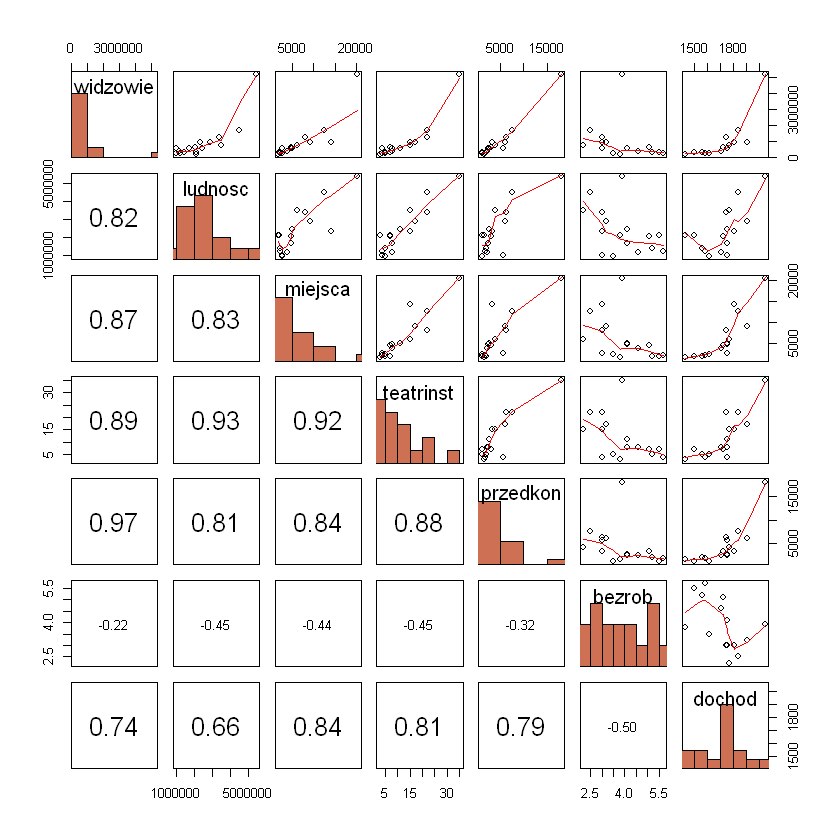

In [20]:
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- cor(x, y, use = 'na.or.complete')
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = if(r>0.5)  2 else 1)
}

panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.35) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y/max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "salmon3", ...)
}
pairs(dane, panel = panel.smooth,
      cex = 1, pch = 1, bg = "blue", horOdd=TRUE,
      diag.panel = panel.hist, cex.labels = 1.5, font.labels = 1, lower.panel = panel.cor)

Bazując na wykresie jesteśmy w stanie zaobserwować relatywnie wysokie korelacje pomiędzy większością zmiennych. Jedyną anomalią wydaje się zmienna „bezrob”, u której korelacja jest prawdopodobnie niska.
 
Macierz korelacji pozwala potwierdzić poprzednie predykcje. Zmienna „bezrob” jako jedyna jest nisko skorelowana z resztą zmiennych. Wszystkie pozostałe zmienne są ze sobą mocno skorelowane. Za pomocą wykonanych testów istotności współczynnika korelacji można stwierdzić, że wszystkie zmienne są istotnie różne od zera, więc mogą pełnić funkcję zmiennych objaśniających modelu. Jako zmienna objaśniana w modelu została wybrana zmienna „widzowie”.


## Stworzenie pierwszego modelu z 6 zmiennymi objasniajacymi

In [21]:
model <- lm(data=dane, widzowie~ludnosc+miejsca+teatrinst+przedkon+bezrob+dochod)
summary(model)


Call:
lm(formula = widzowie ~ ludnosc + miejsca + teatrinst + przedkon + 
    bezrob + dochod, data = dane)

Residuals:
    Min      1Q  Median      3Q     Max 
-268028 -141471  -33259  143964  322872 

Coefficients:
                  Estimate     Std. Error t value  Pr(>|t|)    
(Intercept) 1014018.220219 1559230.094992   0.650    0.5317    
ludnosc          -0.005904       0.141170  -0.042    0.9676    
miejsca          67.459643      30.955519   2.179    0.0572 .  
teatrinst     13023.610638   30133.366980   0.432    0.6758    
przedkon        237.874419      32.330330   7.358 0.0000429 ***
bezrob       144190.229278   68295.497110   2.111    0.0639 .  
dochod        -1326.112434     866.639241  -1.530    0.1603    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 228700 on 9 degrees of freedom
Multiple R-squared:  0.9788,	Adjusted R-squared:  0.9647 
F-statistic: 69.39 on 6 and 9 DF,  p-value: 0.0000005034


## Stworzenie pierwszego modelu z 3 zmiennymi objasniajacymi

In [29]:
model1 <- lm(data = dane, widzowie~miejsca+przedkon+bezrob)
summary(model1)


Call:
lm(formula = widzowie ~ miejsca + przedkon + bezrob, data = dane)

Residuals:
    Min      1Q  Median      3Q     Max 
-401639 -125307  -29309  157930  344726 

Coefficients:
               Estimate  Std. Error t value   Pr(>|t|)    
(Intercept) -1158044.27   289525.10  -4.000    0.00176 ** 
miejsca           61.14       21.52   2.841    0.01487 *  
przedkon         231.01       26.19   8.822 0.00000136 ***
bezrob        170801.93    61775.27   2.765    0.01712 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231000 on 12 degrees of freedom
Multiple R-squared:  0.9712,	Adjusted R-squared:  0.964 
F-statistic: 134.9 on 3 and 12 DF,  p-value: 0.000000001653


Model prezentuje się następująco: <br>
<font color='red'>*Y= 61,14X_1+231X_2+170800X_3-1158000*</font>

Na podstawie testu T-Studenta można przyjąć wszystkie 3 zmienne objaśniające oraz wyraz wolny do modelu. Wpływają one istotnie na model. Skorygowany R2 wynosi 96,4% co jest świetnym wynikiem i oznacza, że dane są znakomicie dopasowane do modelu. Interpretacji parametrów strukturalnych: <br>
Miejsca – wraz ze wzrostem miejsc na widowni o 1szt. liczba widzów i słuchaczy ogółem zwiększy się o 61,14 ceteris paribus. <br>
Przedkon – wraz ze wzrostem liczby przedstawień i koncertów o 1j liczba widzów i słuchaczy ogółem zwiększy się o 231osób ceteris paribus. <br>
Bezrob – wraz ze wzrostem udziału bezrobotnych zarejestrowanych w liczbie ludności w wieku produkcyjnym o 1pp liczba widzów i słuchaczy ogółem zwiększy się o 170800osób. 


In [28]:
#Wartosci teoretyczne
model1$fitted.values

#Reszty
model1$residuals

DOLNOŚLĄSKIE  KUJAWSKO-POMORSKIE           LUBELSKIE            LUBUSKIE 
         1336586.99           736767.76           156967.28           843751.75 
            ŁÓDZKIE         MAŁOPOLSKIE         MAZOWIECKIE            OPOLSKIE 
          462057.54          1297800.52          4949509.57          -152116.15 
       PODKARPACKIE           PODLASKIE           POMORSKIE             ŚLĄSKIE 
          -41099.64           399964.17           981351.54          1794609.37 
     ŚWIĘTOKRZYSKIE WARMIŃSKO-MAZURSKIE       WIELKOPOLSKIE  ZACHODNIOPOMORSKIE 
          383546.78           304758.24           526771.23           382044.07

DOLNOŚLĄSKIE  KUJAWSKO-POMORSKIE           LUBELSKIE            LUBUSKIE 
         -401638.99          -164648.76           117713.72          -313707.75 
            ŁÓDZKIE         MAŁOPOLSKIE         MAZOWIECKIE            OPOLSKIE 
           44385.46           -41469.52           241256.43           344726.15 
       PODKARPACKIE           PODLASKIE           POMORSKIE             ŚLĄSKIE 
          221634.64           -71460.17           -60355.54          -121886.37 
     ŚWIĘTOKRZYSKIE WARMIŃSKO-MAZURSKIE       WIELKOPOLSKIE  ZACHODNIOPOMORSKIE 
         -135568.78           -17149.24           221393.77           136774.93

## Wykresy diagnostyczne

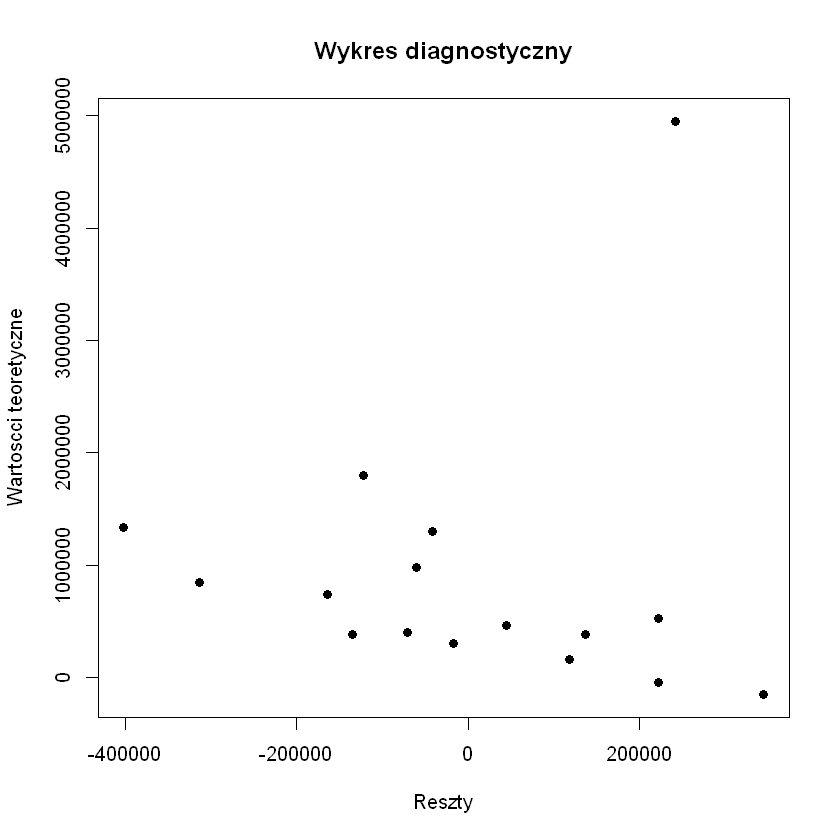

In [23]:
plot(model1$residuals, model1$fitted.values, xlab= "Reszty",
     ylab = "Wartoscci teoretyczne" ,pch=16, main = "Wykres diagnostyczny")

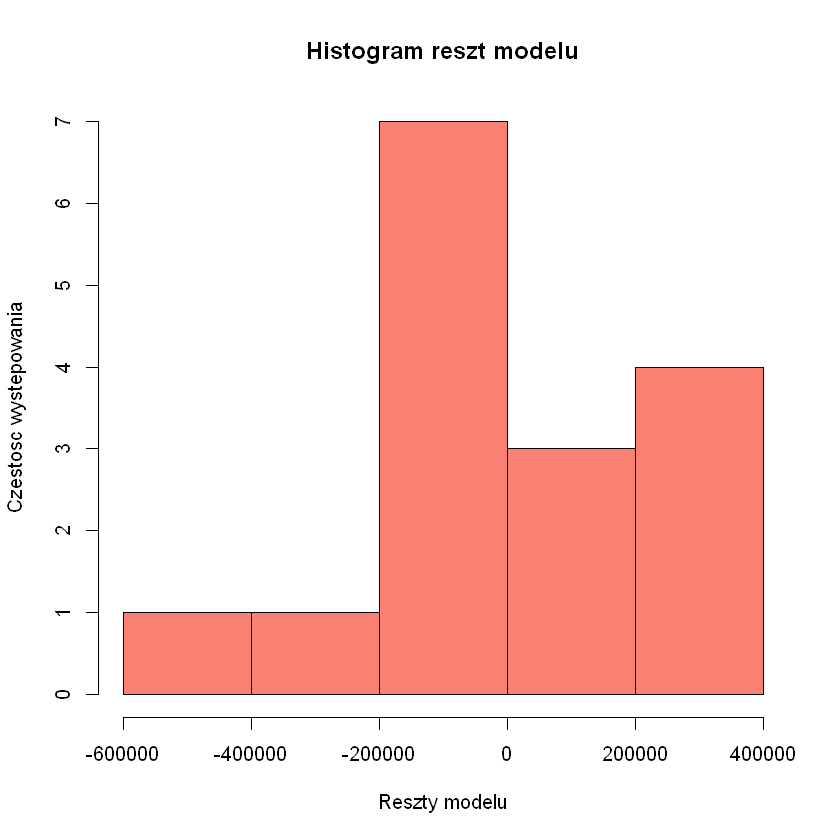

In [24]:
hist(model1$residuals, xlab = "Reszty modelu", ylab = "Czestosc wystepowania",
     col = "salmon", main = "Histogram reszt modelu", border = "black")

Wnioskując po histogramie reszt oraz wykresie rozrzutu reszt, wykonanych w R można przypuszczać, że reszty posiadają rozkład normalny. <br> W celu potwierdzenia tej tezy zostanie wykonany test Shapiro-Wilka. 

## Test Shapiro-Wilka 

In [25]:
shapiro.test(model1$residuals) #h0=normalny, pvalue wysokie - brak podstaw do odrzucenia h0


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.97367, p-value = 0.8939


P-value jest zdecydowanie większe od przyjętego poziomu istotności alfa=0,05, co sprawia, że nie ma podstaw do odrzucenia hipotezy zerowej. <br> Przyjęto, że reszty modelu są zgodne z rozkładem normalnym.

### Wnioski końcowe 
Analiza regresji wykazała, że głównymi czynnikami wpływającymi na uczestnictwo w wydarzeniach kulturalnych w Polsce w 2019 roku są liczba miejsc na widowni oraz liczba przedstawień i koncertów. <br> Wraz ze wzrostem wartości tych dwóch zmiennych wzrasta również ogólna liczba uczestników wydarzeń kulturalnych. 